<a href="https://colab.research.google.com/github/subhayuroy/DogBreed_Analysis/blob/main/DogBreed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: __init__.py             
  inflating: decode_predictions.py   
  inflating: dl/exercise_1.py        
  inflating: dl/exercise_2.py        
  inflating: gan_utils.py            
  inflating: gans/__init__.py        
  inflating: gans/discriminators.py  
  inflating: gans/gan_utils.py       
  inflating: gans/generators.py      
  inflating: utils/__init__.py       
  inflating: utils/decode_predictions.py  
  inflating: utils/dl/exercise_1.py  
  inflating: utils/dl/exercise_2.py  
  inflating: utils/gan_utils.py      
  inflating: utils/gans/__init__.py  
  inflating: utils/gans/discriminators.py  
  inflating: utils/gans/gan_utils.py  
  inflating: utils/gans/generators.py  


In [4]:
!unzip ResNet-50.zip

Archive:  ResNet-50.zip
  inflating: imagenet_class_index.json  
  inflating: resnet50_weights_tf_dim_ordering_tf_kernels.h5  
  inflating: resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5  


In [22]:
!unzip dog-breed-identification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/841463629c4833816e216cbb041c2778.jpg  
  inflating: train/84

In [23]:
from IPython.display import Image, display
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from os.path import join

In [24]:
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [34]:
import cv2
import os

def load_images_from_folder(folder):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        print(type(img))
        if img is not None:
            return img

In [68]:
from os.path import join

image_dir = '/content/train'
img_paths = [join(image_dir, filename) for filename in ['0c8fe33bd89646b678f6b2891df8a1c6.jpg',
                                                        '0c3b282ecbed1ca9eb17de4cb1b6e326.jpg',
                                                        '04fb4d719e9fe2b6ffe32d9ae7be8a22.jpg',
                                                        '0e79be614f12deb4f7cae18614b7391b.jpg']]

# import glob
# img_paths = glob.glob("/content/train/*.jpg")

# import os
# relevant_path = "/content/train"
# included_extensions = ['jpg']
# file_names = [fn for fn in os.listdir(relevant_path)
#               if any(fn.endswith(ext) for ext in included_extensions)]

In [38]:
from tensorflow.keras.applications import ResNet50

my_model = ResNet50(weights='resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

**Create Model with Pre-Trained Weights File. Make Predictions**

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

img_rows, img_cols = 28, 28
num_classes = 10

In [9]:
def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

In [ ]:
!unzip dog-gone-sideways.zip

**Indicate whether the first layer should be trained/changed or not.**

In [12]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D

breed_model = Sequential()

***Adding first layer***

In [ ]:
breed_model.add(Conv2D(12,
                         activation='relu',
                         kernel_size=3,
                         input_shape = (img_rows, img_cols, 1)))

***Adding remaining layer***

In [ ]:
breed_model.add(Conv2D(20, activation='relu', kernel_size=3))
breed_model.add(Conv2D(20, activation='relu', kernel_size=3))
breed_model.add(Flatten())
breed_model.add(Dense(100, activation='relu'))
breed_model.add(Dense(num_classes, activation='softmax'))

***Compiling MODEL***

In [ ]:
breed_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

***Fitting the Model***

In [ ]:
data_generator = ImageDataGenerator(preprocess_input)

In [ ]:
train_generator = data_generator.flow_from_directory(
                                        directory='dogs-gone-sideways/images/train',
                                        target_size=(image_size, image_size),
                                        batch_size=10,
                                        class_mode='categorical')

In [ ]:
validation_generator = data_generator.flow_from_directory(
                                        directory='dogs-gone-sideways/images/test',
                                        target_size=(image_size, image_size),
                                        class_mode='categorical')

In [ ]:
fit_stats = my_new_model.fit_generator(train_generator,
                                       steps_per_epoch=22,
                                       epochs=1,
                                       validation_data=validation_generator,
                                       validation_steps=1)

In [ ]:
breed_model.summary()

###New Model

In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [17]:
num_classes = 2
resnet_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

new_model = Sequential()
new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
new_model.add(Dense(num_classes, activation='softmax'))

**Indicate whether the first layer should be trained/changed or not.**

In [18]:
new_model.layers[0].trainable = False

In [19]:
new_model.compile(optimizer='sgd', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

In [20]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocess_input)

In [ ]:
train_generator = data_generator.flow_from_directory(
                                        directory='dogs-gone-sideways/images/train',
                                        target_size=(image_size, image_size),
                                        batch_size=10,
                                        class_mode='categorical')

In [ ]:
validation_generator = data_generator.flow_from_directory(
                                        directory='dogs-gone-sideways/images/test',
                                        target_size=(image_size, image_size),
                                        class_mode='categorical')

In [ ]:
fit_stats = new_model.fit_generator(train_generator,
                                       steps_per_epoch=22,
                                       epochs=1,
                                       validation_data=validation_generator,
                                       validation_steps=1)

In [ ]:
new_model.summary()

**Visualize Predictions**

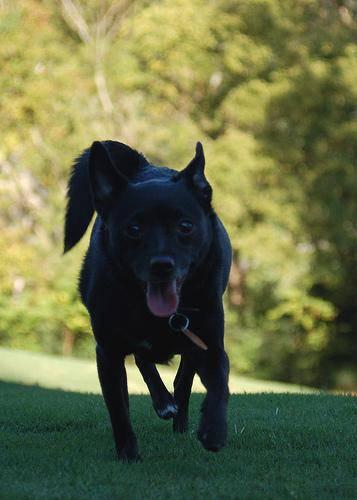

Staffordshire_bullterrier





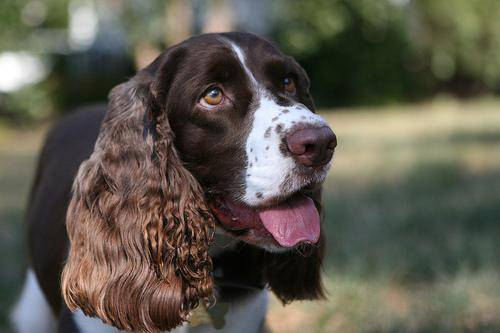

English_springer





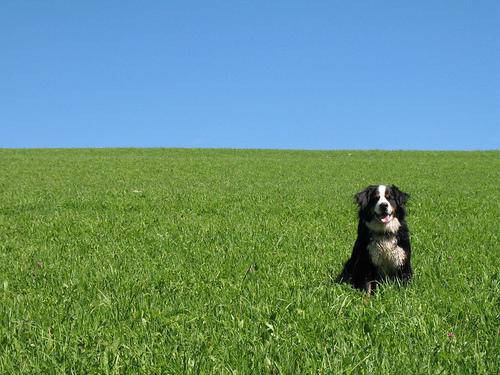

Bernese_mountain_dog





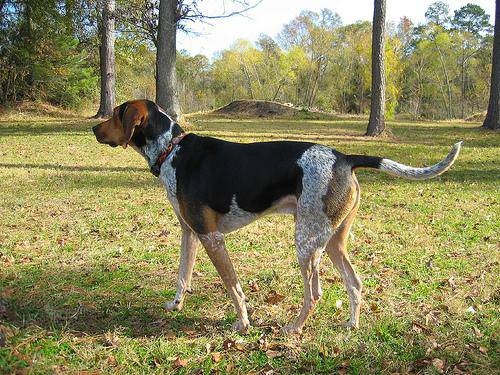

bluetick





In [70]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from IPython.display import Image, display

most_likely_labels = decode_predictions(preds, top=3)

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i][0][1])
    print("\n\n")